In [18]:
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
df = pd.read_csv('../data/complete_enron.csv')
df

,Unnamed: 0,index,content,fcontent,topic,vader_sentiment,vader_sentiment_bin,Topic
0,0,0,Here is our forecast\n\n,['forecast'],"[(0, 0.012501605), (1, 0.012501605), (2, 0.012...",0.000000,Neutral,Modern History
1,1,1,Traveling to have a business meeting takes the...,"['travel', 'business', 'meeting', 'take', 'fun...","[(0, 0.15656357), (1, 0.03257292), (2, 0.01856...",0.217700,Slightly Positive,Government
2,2,2,test successful. way to go!!!,"['test', 'successful', 'way']","[(10, 0.2562595), (34, 0.5062273)]",0.195300,Slightly Positive,Literature
3,3,3,"Randy,\n\n Can you send me a schedule of the s...","['randy', 'send', 'schedule', 'salary', 'level...","[(6, 0.120515056), (18, 0.19427584), (19, 0.16...",0.000000,Neutral,Engineering
4,4,4,Let's shoot for Tuesday at 11:45.,"['let', 'shoot', 'tuesday']","[(15, 0.34167174), (37, 0.3415987)]",-0.340000,Moderately Negative,Journalism
...,...,...,...,...,...,...,...,...
92187,97680,98218,Effective 11/1/00 deliveries to Eastrans is 30...,"['effective', 'delivery', 'eastrans', 'mmbtudy...","[(9, 0.17084026), (18, 0.17078577), (19, 0.170...",0.476700,Moderately Positive,Nature
92188,97681,98219,"PW, \n\nHPL's spot and base purchases by zone ...","['pw', 'hpls', 'spot', 'base', 'purchase', 'zo...","[(8, 0.11305909), (11, 0.12829624), (15, 0.149...",0.000000,Neutral,Astronomy
92189,97682,98220,The schedule is attached. I will remind you a...,"['schedule', 'attach', 'remind', 'day', 'advan...","[(0, 0.36822718), (20, 0.09971282), (25, 0.202...",0.000000,Neutral,Winter Olympics
92190,97683,98221,Enron Methanol nominates the following natural...,"['enron', 'methanol', 'nominate', 'follow', 'n...","[(5, 0.2574057), (8, 0.07809814), (18, 0.33238...",0.612400,Very Positive,Engineering


# Length
We first count the number of words in the Enron emails, and take the average length of each email. 

In [20]:
c = 0
for i in range(len(df)):
    c += len(str(df['content'][i]).split())
print(c)
print(c/len(df))

6372863
69.12598707046165


In [21]:
leng =[]
for i in range(len(df)):
    leng.append(len(str(df['content'][i]).split()))

We now look at the distribution of emails by length. There are a few emails beyond 500 words, with some being more than 30,000, these were ignored as many were automated emails. 

(array([18066., 13799., 10977., 13227.,  8107.,  7572.,  7698.,  4498.,
         4563.,  2376.,  1309.]),
 array([  0,  10,  20,  30,  50,  70, 100, 150, 200, 300, 400, 500]),
 <BarContainer object of 11 artists>)

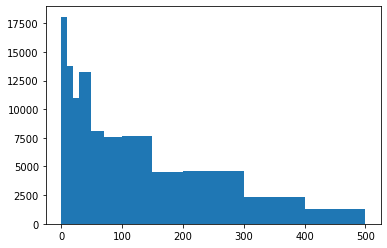

In [22]:
plt.hist(leng,bins=[0,10,20,30,50,70,100,150,200, 300,400,500])

# Sentiment
We now find the distribution of sentiment bins over the Enron emails.

<AxesSubplot:>

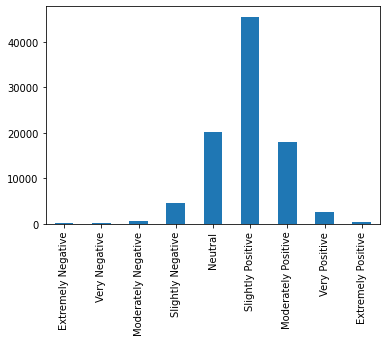

In [23]:
d1 = df['vader_sentiment_bin'].value_counts()
d1 = d1.reindex(['Extremely Negative','Very Negative', 'Moderately Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Moderately Positive', 'Very Positive', 'Extremely Positive'])
d1.plot.bar()

We now split the interval [0,1] accroding to the frequency of the sentiment bin.

In [24]:
score = df['vader_sentiment_bin'].value_counts(normalize=True) 
count = 0
cum = []
for i in range(len(score) - 1):
    count += score[i]
    cum.append(count)
cum.append(1)
names = score.index.tolist()
df1 = pd.DataFrame()
df1['names'] = names
df1['score'] = cum
df1
df1.to_csv('../data/SentDist.csv')

In [25]:
df1

,names,score
0,Slightly Positive,0.494132
1,Neutral,0.712415
2,Moderately Positive,0.907150
3,Slightly Negative,0.957643
4,Very Positive,0.986127
5,Moderately Negative,0.992895
6,Extremely Positive,0.997570
7,Very Negative,0.999403
8,Extremely Negative,1.000000


topics

# Topics
We will now look at the distribution of topics over Enron. 

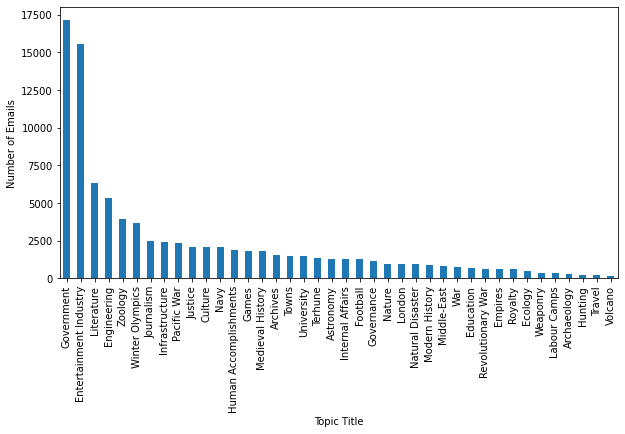

In [27]:
df['Topic'].value_counts().plot.bar(figsize=(10,5))
plt.ylabel('Number of Emails')
plt.xlabel('Topic Title')
plt.show()

We now split the interval [0,1] accroding to the frequency of the Topics.

In [40]:
score = df['Topic'].value_counts(normalize=True) 
count = 0
cum = []
for i in range(len(score) - 1):
    count += score[i]
    cum.append(count)
cum.append(1)
names = score.index.tolist()
df1 = pd.DataFrame()
df1['names'] = names
df1['score'] = cum
df1
df1.to_csv('../data/TopicDist.csv')